***
*Course:* [Math 535](http://www.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Author:* [Sebastien Roch](http://www.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
***

# <span style="background-color:dodgerblue; color:white; padding:2px 6px">APPLICATIONS</span> 
# Community detection and image segmentation


*Updated:* April 7, 2020 

## Contents

[Recap from the lectures](#Recap-from-the-lectures)

1 [Community detection](#1-Community-detection)

2 [Image segmentation](#2-Image-segmentation)

In [1]:
# Julia version: 1.3.1
using LightGraphs, GraphPlot, LinearAlgebra, Plots
using Images, QuartzImageIO, ImageSegmentation, Clustering, Statistics, Random

## Recap from the lectures

***The setup*** We work primarily with undirected graphs.

**Definition (Undirected Graph):** An undirected graph (or graph for short) 
is a pair $G = (V,E)$ where $V$ is the set of vertices (or nodes) and

$$
E \subseteq \{\{u,v\}\,:\, u,v \in V\}
$$

is the set of edges.$\lhd$

**Definition (Incidence and Adjacency):** A vertex $v \in V$ is incident with an edge $e \in E$ if $v \in e$. The incident vertices of an edge are called its endvertices. Two vertices $u,v \in V$ are adjacent (or neighbors), which we denote by $u \sim v$, if $\{u,v\} \in E$. $\lhd$

**Definition (Neighborhood and Degrees):** The set of adjacent vertices of $v$, denoted by $N(v)$, is called the neighborhood of $v$ and its size, i.e.~$\delta(v):=|N(v)|$, is the degree of $v$. $\lhd$

A convenient way of specifying a graph is the following matrix representation.

**Definition (Adjacency Matrix)**: Assume the undirected graph $G = (V,E)$ has
$n = |V|$ vertices. The adjacency matrix $A$ of $G$ is the $n\times n$ symmetric matrix
defined as

$$
\begin{align}
A_{xy} 
= 
\begin{cases}
1 & \text{if $\{x,y\} \in E$}\\ 
0 & \text{o.w.}
\end{cases}
\end{align}
$$

$\lhd$

Our key definition is the following.

**Definition (Laplacian Matrix):** Let $G = (V,E)$ be a graph with vertices $V = \{1, \ldots, n\}$ and adjacency matrix $A \in \mathbb{R}^{n \times n}$. Let $D = \mathrm{diag}(\delta(1), \ldots, \delta(n))$ be the degree matrix. The Laplacian matrix associated to $G$ is defined as $L = D - A$. Its entries are

$$
l_{ij}
=
\begin{cases}
\delta(i) & \text{if $i = j$}\\
-1 & \text{if $\{i,j\} \in E$}\\
0 & \text{o.w.}
\end{cases}
$$

$\lhd$

***The theory*** When $A$ is symmetric, that is, $a_{ij} = a_{ji}$ for all $i,j$, a remarkable result is that $A$ is similar to a diagonal matrix by an orthogonal transformation. Put differently, there exits an orthonormal basis of $\mathbb{R}^d$ made of eigenvectors of $A$.

***

**Theorem (Spectral Theorem):** Let $A \in \mathbb{R}^{d \times d}$ be a symmetric matrix. Then $A$ has $d$ orthonormal eigenvectors $\mathbf{q}_1, \ldots, \mathbf{q}_d$ with corresponding (not necessarily distinct) real eigenvalues $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d$. In matrix form, this is written as the matrix factorization

$$
A 
= Q \Lambda Q^T
= \sum_{i=1}^d \lambda_i \mathbf{q}_i \mathbf{q}_i^T
$$

where $Q$ has columns $\mathbf{q}_1, \ldots, \mathbf{q}_d$ and $\Lambda = \mathrm{diag}(\lambda_1, \ldots, \lambda_d)$. We refer to this factorization as a spectral decomposition of $A$.

***

There is an important special case where the eigenvalues are nonnegative.

**Definition (Positive Semidefinite Matrix):** A symmetric matrix $A \in \mathbb{R}^{d \times d}$ is positive semidefinite (PSD) if 

$$
\langle \mathbf{x}, A \mathbf{x} \rangle \geq 0, \quad \forall \mathbf{x} \neq \mathbf{0}. 
$$

If the inequality is strict, we say that $A$ is positive definite. $\lhd$

***

**Theorem (PSD Matrices have Nonnegative Eigenvalues):** Let $A \in \mathbb{R}^{d \times d}$ be a symmetric matrix and let $A = Q \Lambda Q^T$ be a spectral decomposition of $A$ with $\Lambda = \mathrm{diag}(\lambda_1, \ldots, \lambda_d)$. Then $A$ is PSD if and only if its eigenvalues $\lambda_1, \ldots, \lambda_d$ are nonnegative.

***

We applied these concepts to graphs. To see that the Laplacian is PSD:

***

**Lemma (Laplacian Quadratic Form):** Let $G = (V, E)$ be a graph with $n = |V|$ vertices. Its Laplacian matrix $L$ is PSD and furthermore we have the following formula for the Laplacian quadratic form

$$
\mathbf{x}^T L \mathbf{x}
= \sum_{e = \{i,j\} \in E} (x_i - x_j)^2
$$

for any $\mathbf{x} = (x_1, \ldots, x_n)^T \in \mathbb{R}^n$.

***

As a convention, we denote that eigenvalues of a Laplacian matrix $L$ by

$$
0 \leq \mu_1 \leq \mu_2 \leq \cdots \leq \mu_n.
$$

Another important observation:

***

**Lemma ($\mu_1 = 0$):** Let $G = (V, E)$ be a graph with $n = |V|$ vertices and Laplacian matrix $L$. The constant unit vector 

$$
\mathbf{y}_1 
= 
\frac{1}{\sqrt{n}} (1, \ldots, 1)^T
$$

is an eigenvector of $L$ with eigenvalue $0$.

***

We used the following important special case of Courant-Fischer for the Laplacian.

***

**Corollary (Extremal Characterization of $\mu_2$):** Let $G = (V, E)$ be a graph with $n = |V|$ vertices. Assume the Laplacian $L$ of $G$ has spectral decomposition $L = \sum_{i=1}^n \mu_i \mathbf{y}_i \mathbf{y}_i^T$ with $0 = \mu_1 \leq \mu_2 \leq \cdots \leq \mu_n$ and $\mathbf{y}_1 = \frac{1}{\sqrt{n}}(1,\ldots,1)^T$. Then

$$
\mu_2 
= \min\left\{
\frac{\sum_{\{u, v\} \in E} (x_u - x_v)^2}{\sum_{u = 1}^n x_u^2} \,:\,
\mathbf{x} = (x_1, \ldots, x_n)^T \neq \mathbf{0}, \sum_{u=1}^n x_u = 0
\right\}.
$$

***





***The algorithm*** Let $G=(V, E)$ be a graph. Imagine that we are interested in finding a good cut. That is, roughly speaking, we seek to divide it into two disjoint subsets of vertices to achieve two goals simultaneously: 

1. the two sets have relatively few edges between them
2. neither set is too small.

One way to make the graph cutting more precise is to consider the following combinatorial quantity. 

**Definition (Isoperimetric Number):** Let $G=(V, E)$ be a graph. A cut is a bipartition $(S, S^c)$ of the vertices of $G$, where $S$ and $S^c$ are non-empty subsets of $V$. For short, we refer to $\emptyset \neq S \subset V$ as a cut. The size of the cut $|\partial S|$ is the number of edges from $S$ to $S^c$, where the edge boundary is defined as

$$
\partial S
=
\{
\{i,j\} \in E : i \in S, j \in S^c 
\}.
$$

The cut ratio of $S$ is 

$$
\phi(S) 
= 
\frac{|\partial S|}{\min\{|S|, |S^c|\}}
$$

and the isoperimetric number (or [Cheeger constant](https://en.wikipedia.org/wiki/Spectral_graph_theory#Cheeger_constant)) of $G$ is the minimum cut ratio over all of its cuts, that is,

$$
\phi_G
= 
\min_{\emptyset \neq S \subset V} \phi(S).
$$

$\lhd$

A key result of spectral graph theory establishes a quantitative relation between the isoperimetric number and the second smallest Laplacian eigenvalue.

***

**Theorem (Cheeger Inequality):** Let $G = (V, E)$ be a graph with $n = |V|$ vertices and maximum degree $\bar{\delta}$. Let $0 = \mu_1 \leq \mu_2 \leq \cdots \leq \mu_n$ be its Laplacian eigenvalues. Then

$$
\frac{\phi_G^2}{2 \bar{\delta}} \leq \mu_2 \leq 2 \phi_G.
$$

***

The proof of the Cheeger Inequality contains an important algorithmic idea.

Let $\mathbf{y}_2 \in \mathbb{R}^n$ be the unit-norm eigenvector of $L$ associated to $\mu_2$. There is one entry of $\mathbf{y}_2 = (y_{2,1}, \ldots, y_{2,n})^T$ for each vertex of $G$. We use these entries to embed the graph $G$ in $\mathbb{R}$: vertex $i$ is mapped to $y_{2,i}$. Now order the entries $y_{2,\pi(1)}, \ldots, y_{2,\pi(n)}$, where $\pi$ is a [permutation](https://en.wikipedia.org/wiki/Permutation), that is, a re-ordering of $1,\ldots,n$. Specifically, $\pi(1)$ is the vertex corresponding to the smallest entry of $\mathbf{y}_{2}$, $\pi(2)$ is the second smallest, and so on. We consider only cuts of the form

$$
S_k = \{\pi(1), \ldots, \pi(k)\}
$$

and we choose the $k \leq n/2$ that minimizes the cut ratio

$$
\phi(S_k)
= \frac{|\partial S_k|}{|S_k|}.
$$



In [2]:
function cut_ratio(A, order, k, n)
    edge_boundary = 0 # initialize size of edge boundary 
    for i=1:k # for all vertices before cut
        for j=k+1:n # for all vertices after cut
            edge_boundary += A[order[i],order[j]] # add one if {i,j} in E
        end
    end
    denominator = min(k, n-k)
    return edge_boundary/denominator
end

function spectral_cut2(A)
    n = size(A,1) # number of vertices
    L = Diagonal(reshape(sum(A,dims=2), n)) - A # construct Laplacian
    v = eigvecs(L) # eigenvectors of L
    order = sortperm(v[:,2]) # index of entries in increasing order
    phi = zeros(Float64, n-1) # initialize cut ratios
    for k=1:n-1
        phi[k] = cut_ratio(A, order, k, n)
    end
    (phimin, imin) = findmin(phi) # find best cut ratio
    return order[1:imin], order[imin+1:end]
end

function viz_cut(g, s; layout=spectral_layout)
    n = nv(g)
    assign = ones(Int64, n)
    assign[s] .= 2
    colors = [colorant"lightseagreen", colorant"orange"]
    nodecolor = colors[assign]
    gplot(g, nodelabel=1:n, nodefillc=nodecolor, layout=layout)
end

viz_cut (generic function with 1 method)

## 1 Community detection

We return to the [Karate Club dataset](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from the lecture.

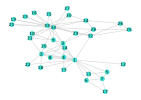

In [3]:
g = smallgraph(:karate)
A = Array(adjacency_matrix(g))
n = nv(g)
gplot(g, nodelabel=1:n)

We seek to find natural sub-communities. We use the spectral properties of the Laplacian as described in the lectures.

First we compute the Laplacian.

In [4]:
degrees = reshape(sum(A,dims=2), n)
D = Diagonal(degrees)
L = D - A

34×34 Array{Int64,2}:
 16  -1  -1  -1  -1  -1  -1  -1  -1  …   0   0   0   0   0   0  -1   0   0
 -1   9  -1  -1   0   0   0  -1   0      0   0   0   0   0  -1   0   0   0
 -1  -1  10  -1   0   0   0  -1  -1      0   0  -1  -1   0   0   0  -1   0
 -1  -1  -1   6   0   0   0  -1   0      0   0   0   0   0   0   0   0   0
 -1   0   0   0   3   0  -1   0   0      0   0   0   0   0   0   0   0   0
 -1   0   0   0   0   4  -1   0   0  …   0   0   0   0   0   0   0   0   0
 -1   0   0   0  -1  -1   4   0   0      0   0   0   0   0   0   0   0   0
 -1  -1  -1  -1   0   0   0   4   0      0   0   0   0   0   0   0   0   0
 -1   0  -1   0   0   0   0   0   5      0   0   0   0   0  -1   0  -1  -1
  0   0  -1   0   0   0   0   0   0      0   0   0   0   0   0   0   0  -1
 -1   0   0   0  -1  -1   0   0   0  …   0   0   0   0   0   0   0   0   0
 -1   0   0   0   0   0   0   0   0      0   0   0   0   0   0   0   0   0
 -1   0   0  -1   0   0   0   0   0      0   0   0   0   0   0   0   0   0
  ⋮

We compute the eigenvalues of the Laplacian and plot them. Note that the smallest one is $0$ and that the other ones are positive, as expected (Exercise: Why?).

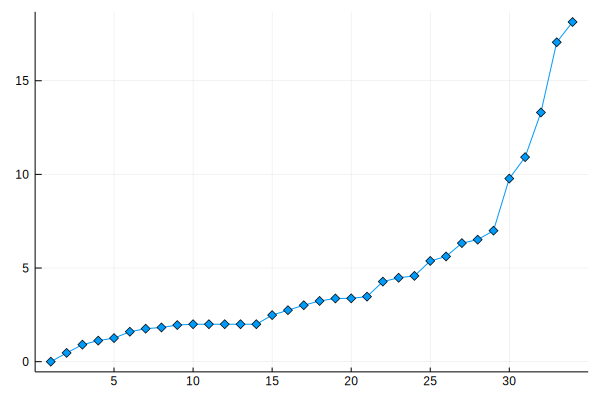

In [5]:
lambda = eigvals(L) # eigenvalues of L 
plot(lambda, legend=false, marker=:diamond)

Next, we compute the eigenvectors and plot the mapping of the vertices to the eigenvector corresponding to the second smallest eigenvalue.

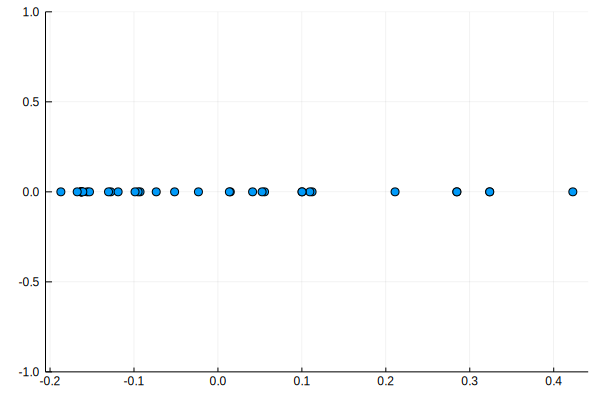

In [6]:
v = eigvecs(L) # eigenvectors of L
scatter(v[:,2], zeros(n), legend=false, ylims=(-1,1))

We use our `spectral_cut2` and `viz_cut` functions to compute a good cut and vizualize it.

In [7]:
(s, sc) = spectral_cut2(A)

([27, 30, 23, 15, 16, 19, 21, 26, 24, 25, 33, 28, 34, 32, 29, 10, 31, 9], [3, 20, 14, 2, 8, 4, 18, 22, 13, 1, 12, 11, 5, 6, 7, 17])

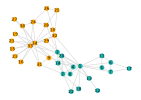

In [8]:
viz_cut(g, s; layout=spring_layout)

It is not trivial to assess the quality of the resulting cut. But this particular example has a known ground-truth community structure (which partly explains its widespread use). Quoting from [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club):
> A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

This ground truth is the following.

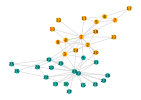

In [9]:
truth = [2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 
    1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1];
nodecolor = [colorant"lightseagreen", colorant"orange"]
gplot(g, nodelabel=1:n, nodefillc=nodecolor[truth])

You can check that our cut perfectly matches the ground truth.

## 2 Image segmentation

We give a different, more involved application of the ideas developed in this topic to image segmentation. Let us quote Wikipedia:

>  In computer vision, image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as image objects). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze. Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.


We'll use a picture from [here](http://icongal.com/gallery/icon/57538/128/panda) as an illustration. We convert it to grayscale, where each pixel has an intensity between $0$ (black) and $1$ (white).

In [10]:
img = Float64.(Gray.(load("./panda.jpg")))

256×256 Array{Float64,2}:
 1.0       1.0       1.0       1.0       …  1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0       …  1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0       …  1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0          1.0       1.0  1.0  1.0  1.0     
 1.0       1.0       1.0       1.0    

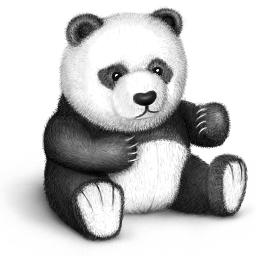

In [11]:
Gray.(img)

To perform image segmentation, we first transform our picture into a graph. The first step is to coarsen the picture by creating super-pixels, or regions of pixels that are close and have similar intensity. For this purpose, we will turn our picture into a more convenient matrix representation. Each row is a pixel, with the first and second columns being the $x$ and $y$-coordinates of the pixel, and the third column being the intensity in a scale of $0$ to $100$.

To loop through the pixels, we will use `eachindex`.

In [12]:
?eachindex

search: eachindex



```
eachindex(A...)
```

Create an iterable object for visiting each index of an `AbstractArray` `A` in an efficient manner. For array types that have opted into fast linear indexing (like `Array`), this is simply the range `1:length(A)`. For other array types, return a specialized Cartesian range to efficiently index into the array with indices specified for every dimension. For other iterables, including strings and dictionaries, return an iterator object supporting arbitrary index types (e.g. unevenly spaced or non-integer indices).

If you supply more than one `AbstractArray` argument, `eachindex` will create an iterable object that is fast for all arguments (a [`UnitRange`](@ref) if all inputs have fast linear indexing, a [`CartesianIndices`](@ref) otherwise). If the arrays have different sizes and/or dimensionalities, `eachindex` will return an iterable that spans the largest range along each dimension.

# Examples

```jldoctest
julia> A = [1 2; 3 4];

julia> for i in eachindex(A) # linear indexing
           println(i)
       end
1
2
3
4

julia> for i in eachindex(view(A, 1:2, 1:1)) # Cartesian indexing
           println(i)
       end
CartesianIndex(1, 1)
CartesianIndex(2, 1)
```


It is also convenient to move between the cartesian position of a pixel (that is, its $x$ and $y$-coordinates) and a linear ordering of the pixels. This can be done using `CartesianIndices`.

For instance, the cartesian indices of the first pixel are:

In [13]:
cartesian = CartesianIndices(img)[1]

CartesianIndex(1, 1)

The cartesian indices of the second pixel are:

In [14]:
cartesian = CartesianIndices(img)[2]

CartesianIndex(2, 1)

The first pixel in the second column is:

In [15]:
cartesian = CartesianIndices(img)[size(img,1)+1]

CartesianIndex(1, 2)

To extract the $x$ and $y$-coordinates:

In [16]:
cartesian[1], cartesian[2]

(1, 2)

The following code creates this matrix representation.

In [17]:
# convenient vectorized representation of the image
compactness = 0.5;
n1, n2 = size(img,1), size(img,2)
n = n1*n2
V = zeros(n,3)
for i in eachindex(img)
    iCart = CartesianIndices(img)[i]
    V[i,1], V[i,2] = iCart[1], iCart[2]
    V[i,3] = compactness*100*img[i]
end

On the choice of the parameter `compactness` via [scikit-image](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic):
> Balances color proximity and space proximity. Higher values give more weight to space proximity, making superpixel shapes more square/cubic. This parameter depends strongly on image contrast and on the shapes of objects in the image. We recommend exploring possible values on a log scale, e.g., 0.01, 0.1, 1, 10, 100, before refining around a chosen value.

Next, we apply $k$-means clustering to `V` to create the super-pixels. We will use the function [`kmeans`](https://juliastats.org/Clustering.jl/stable/kmeans.html#Clustering.kmeans) from the [Clustering.jl](https://juliastats.org/Clustering.jl/stable/index.html) package. Note that it takes as input the transpose of our data matrix.

In [18]:
k = 200
R = kmeans(V',k)
a = assignments(R) # cluster assignments
c = counts(R); # cluster sizes

The [ImageSegmentation.jl](https://juliaimages.org/stable/imagesegmentation/) package provides a data structure for segmented images which we will use to encode the regions we obtained from $k$-means clustering.

In [19]:
?SegmentedImage

search: SegmentedImage



`SegmentedImage` type contains the index-label mapping, assigned labels, segment mean intensity and pixel count of each segment.


In [20]:
# for each region (i.e. cluster), region mean intensity
reg_mean = [mean(img[findall(x->x==j,a)]) for j=1:k]

# for each pixel, corresponding region mean and assignment
p_reg_mean = zeros(n1,n2)
p_assign = zeros(n1,n2)
for i=1:n
    cart = CartesianIndices(img)[i] # cartesian coordinates of pixel i
    p_assign[cart] = a[i] # region assignment of pixel i
    p_reg_mean[cart] = reg_mean[a[i]] # region mean of pixel i
end
   
# dictionary form of region means and pixel counts
reg_mean_dict = Dict([(j,reg_mean[j]) for j=1:k])
reg_count_dict = Dict([(j,c[j]) for j=1:k]);

# creating the segmented image
seg = SegmentedImage(p_assign, collect(1:k), reg_mean_dict, reg_count_dict)

Segmented Image with:
  labels map: 256×256 Array{Float64,2}
  number of labels: 200

If we vizualize `p_reg_mean`, each pixel is replaced with the mean intensity of the region it belongs to.

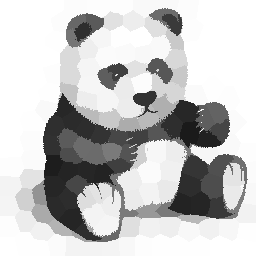

In [21]:
Gray.(p_reg_mean)

We can now construct the graphical representation of our regions. Here each vertex of the graph is a region and edges are between adjacent regions. We also put a weight on the edge that captures the similarity between the mean intensities of the regions. This is a rather complicated task and we will use the `region_adjacency_graph` function in [ImageSegmentation.jl](https://juliaimages.org/stable/imagesegmentation/).

In [22]:
?region_adjacency_graph

search: region_adjacency_graph



```
G, vert_map = region_adjacency_graph(seg, weight_fn)
```

Constructs a region adjacency graph (RAG) from the `SegmentedImage`. It returns the RAG along with a Dict(label=>vertex) map. `weight_fn` is used to assign weights to the edges.

```
weight_fn(label1, label2)
```

Returns a real number corresponding to the weight of the edge between label1 and label2.


In [23]:
sigma = 100
d_fn(i,j) = (100*segment_mean(seg,Int64(i)) - 100*segment_mean(seg,Int64(j)))^2
weight_fn(i,j) = exp(-d_fn(i,j)/sigma)
g, vert_map = region_adjacency_graph(seg, weight_fn);

Plotting the resulting graph, we see that it resembles a [triangulation](https://en.wikipedia.org/wiki/Triangulation_(geometry)) of a plane region.

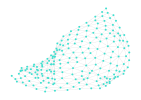

In [24]:
gplot(g)

In fact, as we inidcated, the graph is weighted. 

In [25]:
g

{200, 570} undirected simple Int64 graph with Float64 weights

The weight function `weight_fn` we used above is recommended by [scikit](https://scikit-image.org/docs/dev/api/skimage.future.graph.html#skimage.future.graph.rag_mean_color). Here is their explanation of the parameter `sigma`:
> Used for computation when mode is “similarity”. It governs how close to each other two colors should be, for their corresponding edge weight to be significant. A very large value of sigma could make any two colors behave as though they were similar.

The only way to understand how this works is to play with `sigma` and see how it affects the outcome below. Try it.

Next we compute a spectral decomposition of the Laplacian and plot the eigenvalues.

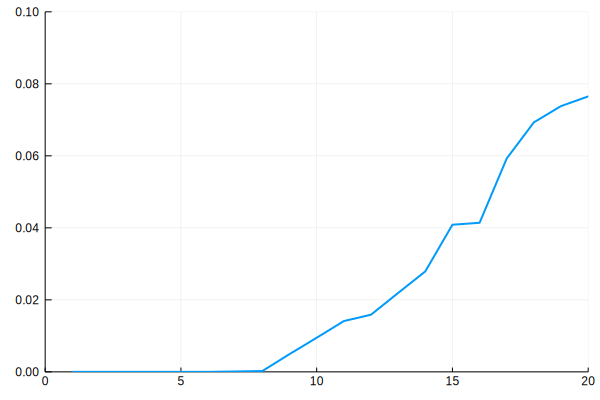

In [26]:
L = Array(laplacian_matrix(g))
F = eigen(L)
plot(F.values, xlim=(0,20), ylim=(0,0.1), legend=false, lw=2)

From the theory, this suggests that there are roughly 10 components in this graph. We project to $10$ dimension and apply $k$-means clustering again to find segments.

In [27]:
ndims = 10 # number of dimensions to project to
proj = reduce(hcat,[F.vectors[:,k] for k=2:2+ndims-1])
nsegs = 15 # number of segments
Rp = kmeans(proj', nsegs)
reg_seg = assignments(Rp); # get the assignments of regions to segments

To vizualize the segmentation, we assign to each segment a random color. See [`Random.seed!`](https://docs.julialang.org/en/v1/stdlib/Random/#Random.seed!) for details. The line `rand(RGB{N0f8})` produces a random color in a particular encoding.

In [28]:
rand(RGB{N0f8})

In [29]:
function get_random_color(seed)
    Random.seed!(seed)
    return rand(RGB{N0f8})
end

get_random_color (generic function with 1 method)

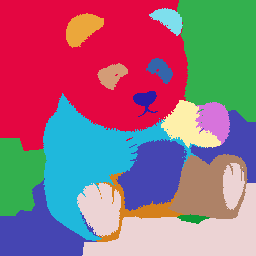

In [30]:
RGB.(map(i->get_random_color(reg_seg[Int64(i)]), labels_map(seg)))

We assign to each segment its mean intensity and plot the image again.

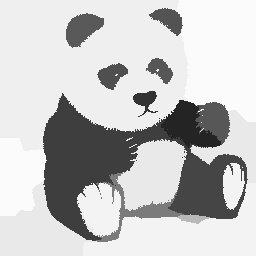

In [31]:
seg_mean = [mean(reg_mean[findall(x->x==j,reg_seg)]) for j=1:nsegs]
Gray.(map(i->seg_mean[reg_seg[Int64(i)]], labels_map(seg)))

Here is the original picture for reference.

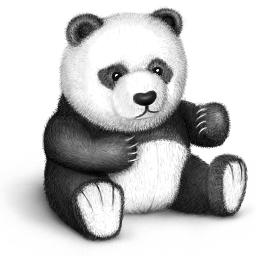

In [32]:
Gray.(img)

This method is quite finicky. The choice of parameters affects the results significantly. You should see for yourself. The package [ImageSegmentation.jl](https://juliaimages.org/stable/imagesegmentation/) has implementations of other methods for image segmentation.